이미지 크기: (512, 512, 3)


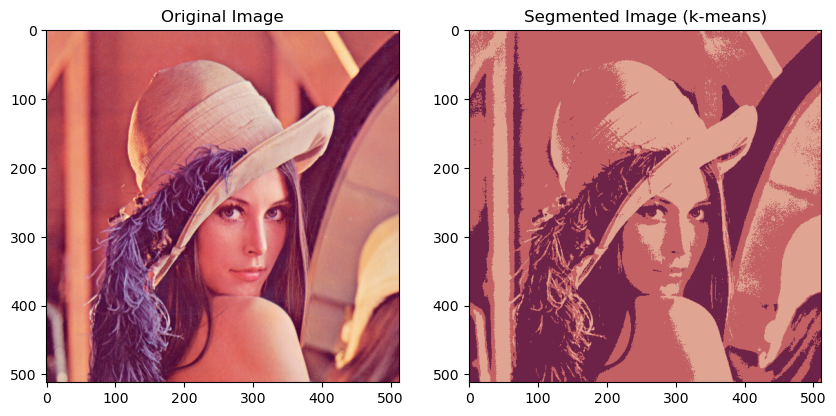

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 컬러 이미지 로드 (cv2 사용)
def load_image_as_color(image_path):
    img = cv2.imread(image_path)  # BGR 형식으로 로드
    if img is None:
        raise ValueError(f"이미지를 로드할 수 없습니다: {image_path}")
    # OpenCV는 BGR 형식이므로 RGB로 변환
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return np.array(img_rgb, dtype=np.float32)

# 2. k-means 군집화 (컬러 이미지용)
def kmeans_clustering_color(image, k=3, max_iterations=100):
    h, w, c = image.shape  # c=3 (RGB 채널)
    # 이미지 데이터를 2D 배열로 변환 (n개의 픽셀, 각 픽셀은 [R, G, B])
    pixels = image.reshape(-1, c)  # (h*w, 3)
    n = pixels.shape[0]  # 총 픽셀 수 (n = h*w)

    # 1단계: 초기 중심 Z를 무작위로 선택
    indices = np.random.choice(n, k, replace=False)
    centroids = pixels[indices].copy()  # (k, 3) - 각 중심은 [R, G, B] 벡터

    # 4~9단계: k-means 군집화 반복
    for iteration in range(max_iterations):
        # 6단계: 각 픽셀을 가장 가까운 중심에 할당
        labels = np.zeros(n, dtype=np.int32)
        for i in range(n):
            # 유클리드 거리 계산 (RGB 공간에서)
            distances = np.sqrt(np.sum((pixels[i] - centroids) ** 2, axis=1))
            labels[i] = np.argmin(distances)

        # 8단계: 새로운 중심 계산
        old_centroids = centroids.copy()
        for j in range(k):
            cluster_pixels = pixels[labels == j]
            if len(cluster_pixels) > 0:
                centroids[j] = np.mean(cluster_pixels, axis=0)  # RGB 평균
            else:
                # 클러스터에 픽셀이 없으면 무작위로 재초기화
                centroids[j] = pixels[np.random.choice(n)]

        # 7단계: 중심 변화가 없으면 종료
        if np.all(old_centroids == centroids):
            break

    # 11단계: 군집화 결과를 이용해 분할된 이미지 생성
    segmented_image = np.zeros((n, c), dtype=np.float32)
    for i in range(n):
        segmented_image[i] = centroids[labels[i]]
    
    return segmented_image.reshape(h, w, c), labels.reshape(h, w)

# 3. 결과 시각화
def plot_results(original_img, segmented_img):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img.astype(np.uint8))  # RGB 이미지는 cmap 없이 표시
    
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image (k-means)")
    plt.imshow(segmented_img.astype(np.uint8))
    plt.show()

# 4. 메인 실행
if __name__ == "__main__":
    image_path = "./image/lena.bmp"  # 실제 이미지 경로로 변경
    color_image = load_image_as_color(image_path)
    print(f"이미지 크기: {color_image.shape}")
    
    # k-means 군집화
    k = 3  # 클러스터 수
    segmented_image, labels = kmeans_clustering_color(color_image, k=k)
    
    # 결과 시각화
    plot_results(color_image, segmented_image)